In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# run once only
print(os.getcwd())
#  moving into the drive directory for the pictures
dir = "gdrive/MyDrive/254pic/Pic"
os.chdir(dir)
print(os.getcwd())

/content
/content/gdrive/MyDrive/254pic/Pic


In [ ]:
# importing files
# https://stackoverflow.com/questions/56449262/how-to-upload-folders-to-google-colab

# neural network
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# https://towardsdatascience.com/the-simplest-way-to-train-a-neural-network-in-python-17613fa97958
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://www.datacamp.com/tutorial/convolutional-neural-networks-python

# train test split in here
# https://kapernikov.com/tutorial-image-classification-with-scikit-learn/



In [ ]:
# pip installs and imports
!pip install matplotlib
!pip install opencv-python
!pip install glob2
!pip install tensorflow
# importing photos
import glob
# plots
import matplotlib as mpl
# image manipulation
import cv2

import PIL
import random
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
# list of fruit names
fruit_names = []
# this is a list of lists where the first index is the type of fruit and the
# second index is the pictures of that fruit
fruit_pics = []

# finding all of the names of the folders in the directory to add them
# to fruit names
for folder in os.listdir():
  # appending the names
  fruit_names.append(folder)
  # for each fruit type we append a list
  fruit_pics.append([])

img_size = 32

print("Names:", fruit_names)
fruit_index = 0
fruit_label_dict = {}
for fruit_folder in fruit_names:
  print(fruit_folder, end = ' ')
  fruit_label_dict[fruit_folder] = fruit_index
  # gets the picture
  for filename in glob.glob("./" + fruit_folder + "/" + "*.jpg"):
    # reads the image and saves it
    img = cv2.imread(filename)
    # converting to rgb colorspace because cv2 weird
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # make image smaller, takes too long with 100x100
    # also this guarentees that our images will be same size
    img = cv2.resize(img, (img_size, img_size))

    # if img actually exists here we append, this is to prevent neural net
    # from training on non existent data
    if img is not None:
      fruit_pics[fruit_index].append(img)
  fruit_index += 1

print(fruit_label_dict)


Names: ['Avocado', 'Banana', 'Blueberry', 'Kiwi', 'Lemon', 'Limes', 'Peach', 'Orange', 'Pineapple', 'Strawberry', 'Watermelon', 'Apple', 'Apple Red', 'logs']
Avocado Banana Blueberry Kiwi Lemon Limes Peach Orange Pineapple Strawberry Watermelon Apple Apple Red logs {'Avocado': 0, 'Banana': 1, 'Blueberry': 2, 'Kiwi': 3, 'Lemon': 4, 'Limes': 5, 'Peach': 6, 'Orange': 7, 'Pineapple': 8, 'Strawberry': 9, 'Watermelon': 10, 'Apple': 11, 'Apple Red': 12, 'logs': 13}


In [ ]:
for i in range(len(fruit_pics)):
  print(len(fruit_pics[i]), end=' ')

562 656 616 622 656 656 820 639 656 656 632 656 573 0 

In [ ]:
raw_data = []
for i in range(len(fruit_pics)):
  for j in range(len(fruit_pics[i])):
    cur = []
    cur.append(fruit_pics[i][j])
    cur.append(i)
    raw_data.append(np.asarray(cur))

t_data = np.asarray(raw_data)
data = t_data
raw_data = np.asarray(raw_data)

print(data.shape)
# print(data[:5])

(8400, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


Pineapple


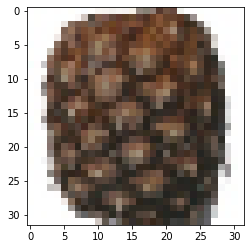

In [ ]:
for i in range(1):
  choice = random.choice(t_data)
  mpl.pyplot.imshow(choice[0])
  print(fruit_names[choice[1]])

In [ ]:
def nooise(num):
  value = np.random.normal(loc=0.0, scale = 100)
  return max(min(num+value, 255), 0)

a = 0
print(len(data))
# grabs each image and its label
for img in data:
  a += 1
  if a % 500 == 0:
    print(a, end = " ")
  # we want only the image rgb values
  for img_data in img[0]:
    # for each rgb in the image 
    for rgb in img_data:
      # grab one of the rows and throw it into the nooise function
      for i in range(len(rgb)):
        # replace the values with the new ones
        rgb[i] = nooise(rgb[i])
      

8400
500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 

Peach


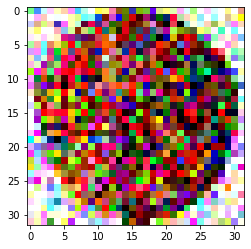

In [ ]:
for i in range(1):
  choice = random.choice(data)
  mpl.pyplot.imshow(choice[0])
  print(fruit_names[choice[1]])

In [ ]:
# Preprocessing the data 
# Split data using 25% split
# Really should consider organizing the data differently into numpy array not lists, and flatten

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
X = data[:, 0]
y = data[:, 1]

model = None

# split data (using 10% split here becuase we have a good amount of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# check split
print("X Training shape:", X_train.shape, " X Testing shape:", X_test.shape, \
      " Y Training shape:", y_train.shape, " Y Testing shape:", y_test.shape)

# Normalize to values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Make sure data is a multidimensional array so the model recognizes how to interpret data
X_train = np.array([np.array(val) for val in X_train])
X_test = np.array([np.array(val) for val in X_test])
y_train = np.array([np.array(val) for val in y_train])
y_test = np.array([np.array(val) for val in y_test])

# Create convolutional layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_size, img_size, 3)),
    # tf.keras.layers.GaussianNoise(0.15),
    tf.keras.layers.Dense(img_size, activation='relu'),
    tf.keras.layers.Dense(len(fruit_names))
  
])

# check the model 
print(model.summary())

# Compile and train the model (may want to adjust these parameters)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

e = 10  # epochs
history = model.fit(X_train, y_train, epochs=e)

# accuracy of 1 in most categories, this means our data is biased, there are
# probably duplicates of training data in testing data and vice versa

# NEED TO CLEAN THE DATA

X Training shape: (7560,)  X Testing shape: (840,)  Y Training shape: (7560,)  Y Testing shape: (840,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 32)                98336     
                                                                 
 dense_1 (Dense)             (None, 14)                462       
                                                                 
Total params: 98,798
Trainable params: 98,798
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
237/237 [==============================] - 2s 4ms/step - loss: 1.5711 - accuracy: 0.5243
Epoch 2/10
237/237 [==============================] - 1s 4ms/step - loss: 0.6335 - accuracy: 0.8495
Epoch 3/

Actual: Apple
Prediction: Peach
Took 45 attempts before getting an answer wrong


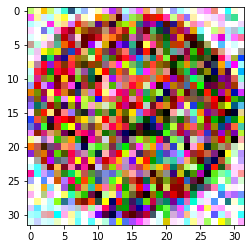

In [ ]:
random_number = None
choice = None
predict = None
got_correct = 0
# set to true if you want to see the model getting an answer wrong
until_false = True
if until_false:
  while True:
    random_number = random.randint(0, len(X_test) - 1)
    choice = X_test[random_number]
    # we need to reshape the single prediction data to (1, img_size, img_size, 3)
    choice = np.reshape(choice, (1, img_size, img_size, 3))
    predict = model.predict(choice, verbose = 0)
    if fruit_names[y_test[random_number]] != fruit_names[np.argmax(predict)]:      
      print("Actual:", fruit_names[y_test[random_number]])
      print("Prediction:", fruit_names[np.argmax(predict)])
      mpl.pyplot.imshow(choice[0])
      print("Took", got_correct, "attempts before getting an answer wrong")
      break
    got_correct += 1
    if got_correct >= 1000:
      break
else:
  random_number = random.randint(0, len(X_test))
  choice = X_test[random_number]
  # we need to reshape the single prediction data to (1, img_size, img_size, 3)
  choice = np.reshape(choice, (1, img_size, img_size, 3))
  predict = model.predict(choice)

  print("Actual:", fruit_names[y_test[random_number]])
  print("Prediction:", fruit_names[np.argmax(predict)])
  mpl.pyplot.imshow(choice[0])
  

In [ ]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9833


[0.06510087102651596, 0.9833333492279053]

In [ ]:
%load_ext tensorboard

In [ ]:
#%tensorboard --logdir logs/fit


27/27 [==============================] - 0s 2ms/step
(840,)
[[61  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0 74  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  2  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 66  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 67  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0 57  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  2 50]]


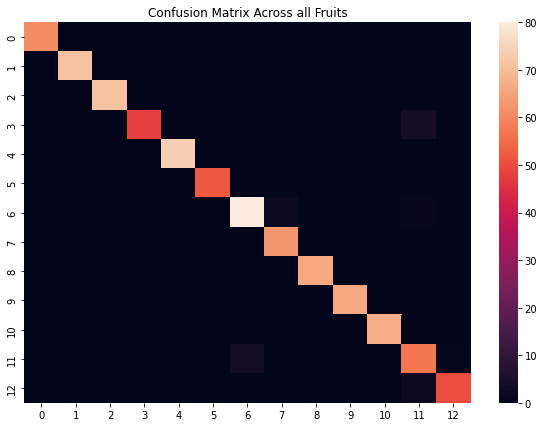

In [ ]:
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt

# Use the model to predict the values from the validation dataset.
pred = model.predict(X_test)
test_pred = np.argmax(pred, axis=1)
print(y_test.shape)

# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(y_test, test_pred)
print(cm)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix Across all Fruits")
sn.heatmap(cm)

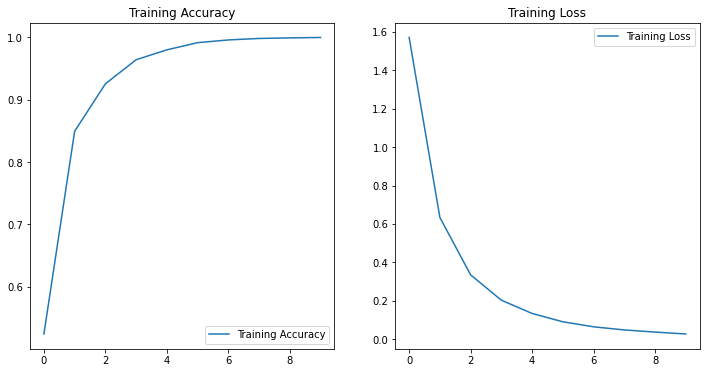

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(e)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

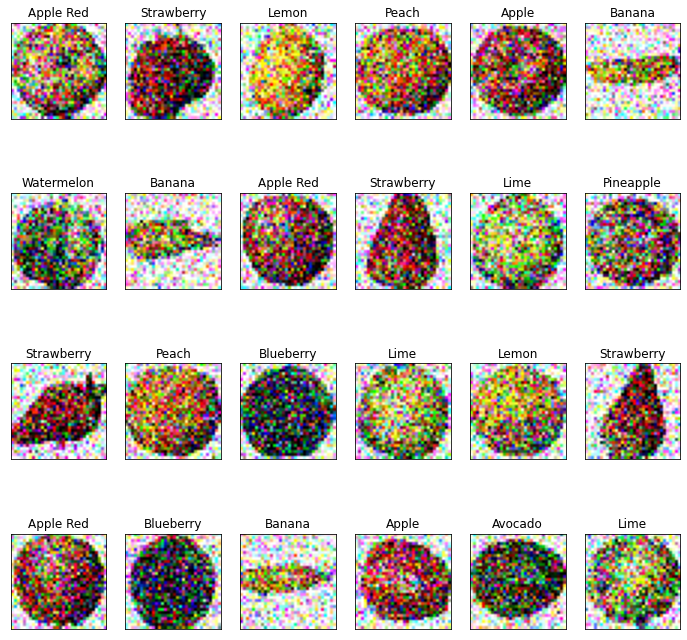

In [ ]:
import matplotlib.pyplot as plt
# Visualize fruits with noise
class_names = ['Avocado', 'Banana', 'Blueberry', 'Kiwi', 'Lemon', 'Lime', 'Peach', 'Orange', 'Pineapple', 'Strawberry', 'Watermelon', 'Apple', 'Apple Red']
figure = plt.figure(figsize=(12,12))
for i in range(24):
  # Start next subplot.
  plt.subplot(4, 6, i+1, title=class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap=plt.cm.binary)

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('\nTrain accuracy:', train_acc, '\n')
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

237/237 - 0s - loss: 0.0225 - accuracy: 0.9999 - 472ms/epoch - 2ms/step

Train accuracy: 0.9998677372932434 

27/27 - 0s - loss: 0.0651 - accuracy: 0.9833 - 56ms/epoch - 2ms/step

Test accuracy: 0.9833333492279053
